<a href="https://colab.research.google.com/github/OFKadi/Bitirme_Projesi/blob/main/Jupyter_Notebooks/VPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

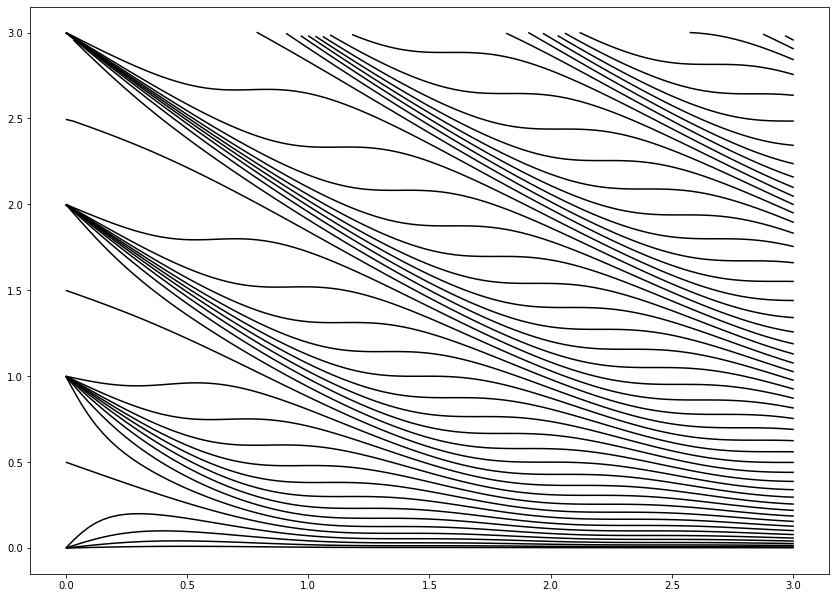

In [ ]:
nn = 100
k_arry = np.linspace(0.01, 3*np.pi, nn)
dq = 0.1*np.pi
q = 0.1*np.pi

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
fig.set_size_inches(18.5, 10.5)

for i in range(51):
  phase = []
  for k in k_arry:
    func = lambda t, y : q**2*np.sin(k*t+y)**2/k
    sol = solve_ivp(func, [0, 1], [0], max_step=0.003, method='DOP853', t_eval=[1])
    phase.append(sol.y[0][0])
  q = q + dq

  phase = np.array(phase)/np.pi
  phase = phase[phase < 3.0]
  
  ax.plot(k_arry[-phase.size:]/np.pi, phase, 'k')